### Employee Promotion Evaluation

#### Problem Statement
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1.	They first identify a set of employees based on recommendations/ past performance
2.	Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
3.	At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

#### Attribute description
employee_id -	Unique ID for employee <br/>
department - Department of employee <br/>
region	- Region of employment (unordered)<br/>
education -	Education Level<br/>
gender	- Gender of Employee<br/>
recruitment_channel	- Channel of recruitment for employee<br/>
no_of_trainings - no of other trainings completed in previous year on soft skills, technical skills etc.<br/>
age	- Age of Employee<br/>
previous_year_rating -	Employee Rating for the previous year<br/>
length_of_service -	Length of service in years<br/>
KPIs_met >80%	- if Percent of KPIs(Key performance Indicators) >80% then 1 else 0<br/>
awards_won?	- if awards won during previous year then 1 else 0<br/>
avg_training_score -	Average score in current training evaluations<br/>
is_promoted	(Target) - Recommended for promotion<br/>


#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd();

In [2]:
emp_data = pd.read_csv('train.csv')
emp_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
emp_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

### Question: Perform Descriptive Statistics on the dataset 

In [5]:
emp_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


### Question: Remove missing values from the data frame

In [6]:
emp_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
data = emp_data.drop(['education','employee_id', 'region'], axis = 1)
finaldata = data.fillna(data.mean(), inplace=True)

#### Categorical columns

In [13]:
cat_columns = finaldata[['department','gender','recruitment_channel']]

#### Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in cat_columns.columns:
    cat_columns[column] = labelencoder.fit_transform(cat_columns[column])

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
labeled_data = finaldata.drop(['department','gender','recruitment_channel'], axis = 1)
train_data = pd.concat([cat_columns, labeled_data], axis=1)

### Question: Perform EDA and find any correlation

#### Correlation

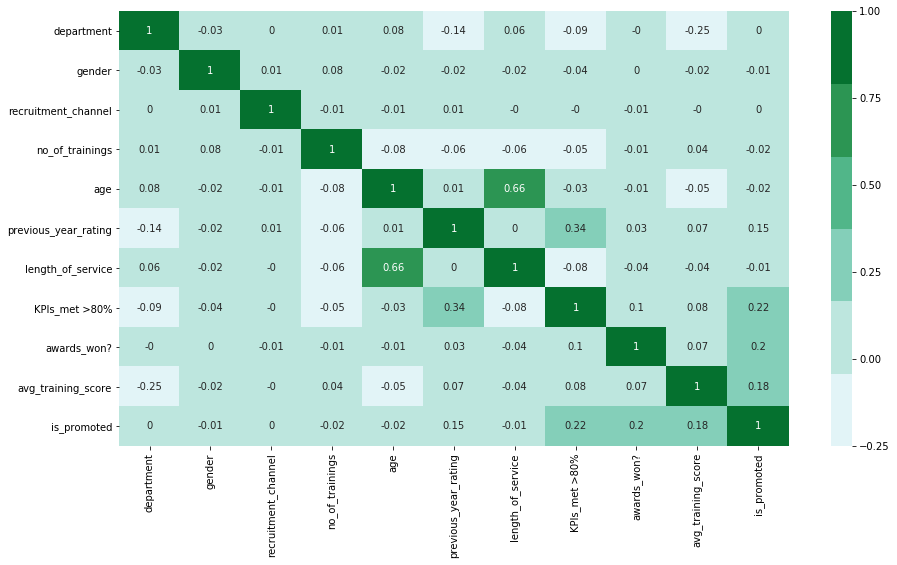

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
cor = round(train_data.corr(),2)
sns.heatmap(cor, cmap = sns.color_palette('BuGn'), annot = True)

#### Age VS Promotion

Text(0.5,1.05,'Age and Promotion Distribution')

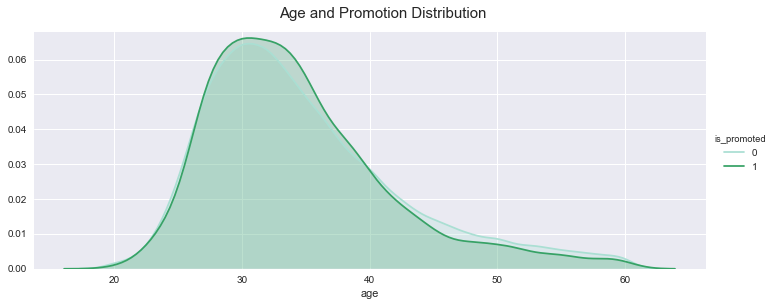

In [47]:
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

age_promoted = sns.FacetGrid(data, hue = 'is_promoted', aspect = 2.5, size = 4, palette = 'BuGn')
age_promoted.map(sns.kdeplot, 'age', shade = True)
age_promoted.add_legend()
plt.suptitle('Age and Promotion Distribution', fontsize = 15, y = 1.05)

**Observations: **From the above plot, we can conclude that age is not an important factor to consider to get promotion. Because if you see the distribution of employees between the age 25 and 40 is almost same.  

#### Education VS Promotion

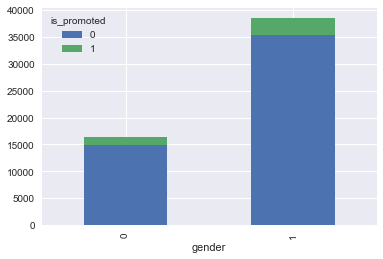

In [49]:
ed = train_data.groupby(['gender', 'is_promoted']).size().unstack()
ed.plot(kind = 'bar', stacked = True)

In [50]:
ed['perc'] = (ed[1]/(ed[0] + ed[1]))
ed

is_promoted,0,1,perc
gender,,,
0,14845,1467,0.089934
1,35295,3201,0.083151


**Observations:** Again, from the above plot, it is clear that gender is also not a factor to consider which means that the employees are getting promoted irrespective of gender.

#### Previous Year Rating VS Promotion

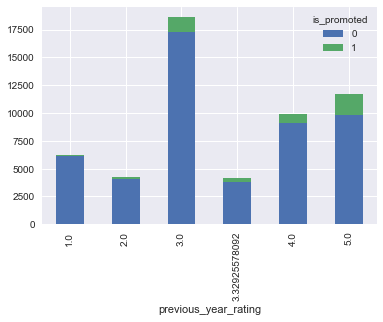

In [53]:
rating = train_data.groupby(['previous_year_rating', 'is_promoted']).size().unstack()
rating.plot(kind = 'bar', stacked = True)

In [62]:
rating['perc'] = (rating[1]/(rating[0] + rating[1]))
rating

is_promoted,0,1,perc
previous_year_rating,,,
1.000000,6135,88,0.014141
2.000000,4044,181,0.042840
3.000000,17263,1355,0.072779
3.329256,3785,339,0.082202
4.000000,9093,784,0.079376
5.000000,9820,1921,0.163615


**Observations:** So from the above analysis, it is clear that 16% of employees got promotion who had good ratings in the previous year.

#### Department VS Promotion

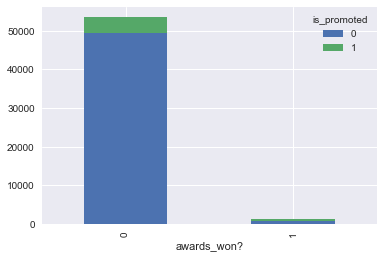

In [64]:
awards = train_data.groupby(['awards_won?', 'is_promoted']).size().unstack()
awards.plot(kind = 'bar', stacked = True)

In [65]:
awards['perc'] = (awards[1]/(awards[0] + awards[1]))
awards

is_promoted,0,1,perc
awards_won?,,,
0,49429,4109,0.076749
1,711,559,0.440157


**Observations:** So employees who won awards in the previous year are high likely to get promoted this year. 44% of the employees who won awards last year got promoted next year.

#### Data Partition

In [22]:
from sklearn.model_selection import train_test_split
features = train_data.drop('is_promoted', axis=1)
target = train_data['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=100)

#### Target variable

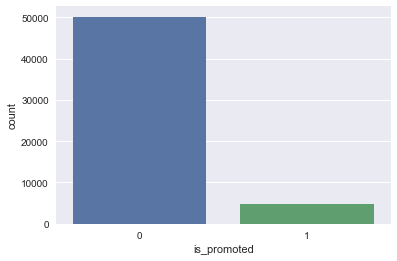

In [23]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="is_promoted", data= train_data)

It is evident that there is a class imbalance in Target variable. Lets handle that with SMOTE technique

#### SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_train_target = oversampler.fit_sample(X_train,y_train)
smote_test,smote_test_target =oversampler.fit_sample(X_test,y_test)

### Question: Perform classification using Support Vector Machines Algorithm and analyse the metrics

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer

svc=SVC(kernel='linear')
svc_fit = svc.fit(smote_train,smote_train_target)
y_predict_train = svc_fit.predict(smote_train)
y_predict_test=svc_fit.predict(smote_test)

#### Classification Report

In [68]:
print("Classification report for test data:\n", classification_report(smote_test_target, y_predict_test))

Classification report for test data:
              precision    recall  f1-score   support

          0       0.76      0.68      0.71     15019
          1       0.71      0.78      0.74     15019

avg / total       0.73      0.73      0.73     30038



#### Confusion Matrix

In [69]:
print("CONFUSION MATRIX \n",confusion_matrix(smote_test_target,y_predict_test))

CONFUSION MATRIX 
 [[10170  4849]
 [ 3270 11749]]


#### Accuracy

In [70]:
print("Train Accuracy Score:", accuracy_score(smote_train_target, y_predict_train))
print("Test Accuracy Score:", accuracy_score(smote_test_target, y_predict_test))

Train Accuracy Score: 0.738603684405
Test Accuracy Score: 0.729709035222
